# Team: Xinyu (Carrie) Yang and Nuo (Ivy) Liu

### Data Import

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use# This  
from fastai.imports import *

In [3]:
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [10]:
arch=resnet34
PATH = "/content/clouderizer/cs152/data/competitions/dog-breed-identification"
sz=224

In [11]:
cd {PATH}

/content/clouderizer/cs152/data/competitions/dog-breed-identification


In [12]:
!unzip '*.zip'

Archive:  labels.csv.zip
  inflating: labels.csv              

Archive:  test.zip
   creating: test/
  inflating: test/000621fb3cbb32d8935728e48679680e.jpg  
  inflating: test/00102ee9d8eb90812350685311fe5890.jpg  
  inflating: test/0012a730dfa437f5f3613fb75efcd4ce.jpg  
  inflating: test/001510bc8570bbeee98c8d80c8a95ec1.jpg  
  inflating: test/001a5f3114548acdefa3d4da05474c2e.jpg  
  inflating: test/00225dcd3e4d2410dd53239f95c0352f.jpg  
  inflating: test/002c2a3117c2193b4d26400ce431eebd.jpg  
  inflating: test/002c58d413a521ae8d1a5daeb35fc803.jpg  
  inflating: test/002f80396f1e3db687c5932d7978b196.jpg  
  inflating: test/0036c6bcec6031be9e62a257b1c3c442.jpg  
  inflating: test/0041940322116ae58c38130f5a6f71f9.jpg  
  inflating: test/0042d6bf3e5f3700865886db32689436.jpg  
  inflating: test/004476c96f575879af4af471af65cae8.jpg  
  inflating: test/00485d47de966a9437ad3b33ac193b6f.jpg  
  inflating: test/00496f65de6cc319145ce97bd6e90360.jpg  
  inflating: test/004bf14426d1a830d459a9e0c

In [13]:
label_csv = f'{PATH}/labels.csv'
n = len(list(open(label_csv)))-1
val_idx = get_cv_idxs(n)

In [14]:
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv', tfms=tfms_from_model(arch, sz), val_idxs=val_idx, suffix='.jpg', test_name='test')

## Load and Train Model

In [9]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 162/162 [00:58<00:00,  2.62it/s]


In [37]:
learn.fit(0.01, 10)

epoch      trn_loss   val_loss   accuracy   
    0      0.180544   0.635875   0.834638  
    1      0.145827   0.632013   0.837573  
    2      0.1514     0.634513   0.835127  
    3      0.133401   0.642123   0.84002   
    4      0.132008   0.63373    0.838063  
    5      0.131025   0.633098   0.836595  
    6      0.133054   0.637505   0.837573  
    7      0.115947   0.624871   0.837573  
    8      0.119447   0.639232   0.841487  
    9      0.115564   0.637113   0.836106  



[array([0.63711]), 0.8361056752634142]

## Save prediction result and submit to Kaggle

In [13]:
data.test_ds.fnames[:10]

['test/f1705303b30da3a48db2a5f34376b947.jpg',
 'test/a9b79809bc1301f8d148e15bfecf6485.jpg',
 'test/cc94a3bb7191a247f59e1540d8430c93.jpg',
 'test/f7b489a38302afc010d8a386a1b7d085.jpg',
 'test/6e21c96226078576342ca66e25eb1aa9.jpg',
 'test/f16eed64196d24c423f0a68d7ebf287d.jpg',
 'test/635f438cd68b65dd6b4e100b338015fd.jpg',
 'test/b827855f566b9569fd668d990854ad0b.jpg',
 'test/5d1e83adfaac47f754f16021615fc8bf.jpg',
 'test/8a08c0b0d4554a270f66f2f16278ee70.jpg']

In [14]:
log_preds, y = learn.predict_with_targs(is_test=True) # use test dataset rather than validation dataset
probs = np.exp(log_preds)

In [15]:
probs.shape # (n_images, n_classes)

(10357, 120)

In [16]:
data.classes

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [28]:
df = pd.DataFrame(probs)
df.columns = data.classes

In [29]:
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])

In [30]:
df.head()
len(df)

10357

In [31]:
SUBM = f'/content/clouderizer/cs152/data/competitions/dog-breed-identification/out/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}dog_breed_identification_result.gz', compression='gzip', index=False)

### Final score on kaggle
<img src="submit.png">

### Test if learning rate is appropriate

In [32]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [33]:
lrf=learn.lr_find()

 86%|████████▌ | 110/128 [00:01<00:00, 55.09it/s, loss=3.48]


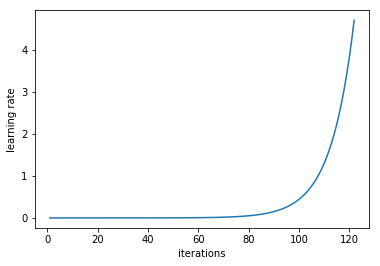

In [34]:
learn.sched.plot_lr()

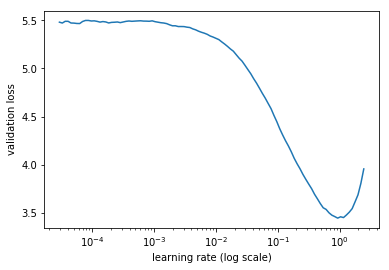

In [35]:
learn.sched.plot()

As we observe, our learning rate (0.01) is okay.

## Data augmentation

In [15]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [16]:
def  get_augs():
    data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv', tfms=tfms, val_idxs=val_idx, suffix='.jpg', test_name='test')
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [44]:
ims = np.stack([get_augs() for i in range(6)])

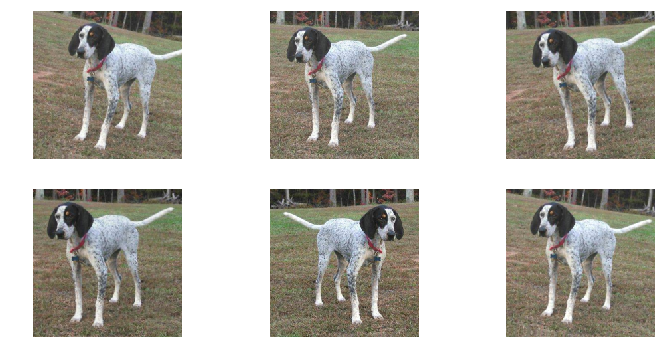

In [45]:
plots(ims, rows=2)

In [17]:
data = ImageClassifierData.from_csv(PATH,'train',f'{PATH}/labels.csv', tfms=tfms, val_idxs=val_idx, suffix='.jpg', test_name='test')
learn = ConvLearner.pretrained(arch, data)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 21937609.14it/s]


In [38]:
learn.fit(1e-2, 10, cycle_len=1)
learn.save('dogbreed')

epoch      trn_loss   val_loss   accuracy   
    0      0.6204     0.498714   0.835616  
    1      0.584051   0.496501   0.840998  
    2      0.567669   0.491946   0.843444  
    3      0.564599   0.483697   0.844423  
    4      0.534878   0.484466   0.835616  
    5      0.52906    0.484248   0.843444  
    6      0.492858   0.472777   0.847847  
    7      0.477061   0.477158   0.83953   
    8      0.4754     0.477645   0.83953   
    9      0.467879   0.472037   0.843933  



In [40]:
learn.load('dogbreed')
log_preds, y = learn.predict_with_targs(is_test=True) # use test dataset rather than validation dataset
log_preds.shape

(10357, 120)

In [41]:
probs = np.exp(log_preds)
df = pd.DataFrame(probs)
df.columns = data.classes
df.insert(0, 'id', [o[5:-4] for o in data.test_ds.fnames])
SUBM = f'/content/clouderizer/cs152/data/competitions/dog-breed-identification/out/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}dog_breed_identification_result2.gz', compression='gzip', index=False)

The second submission has a improved score.
<img src="submit2.png">

## Fine-tuning the model

In [45]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.597095   0.534159   0.823386  
    1      0.557728   0.527687   0.828767  
    2      0.446166   0.498242   0.832192  
    3      0.446913   0.516846   0.834149  
    4      0.396994   0.5016     0.834149  
    5      0.328513   0.495793   0.83953   
    6      0.292871   0.493606   0.837573  



[array([0.49361]), 0.8375733856352341]

This does not look better than the previous ones, so we don't submit that.